In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def extraer_marca(linea):
    ultimo_valor_str = linea.split("\t")[-1]
    ultimo_valor_str = ultimo_valor_str.replace(",", ".")
    ultimo_valor = float(ultimo_valor_str)
    return ultimo_valor


def extraer_periodo_frecuencia(linea):
    valores = linea.split("\t")
    periodo = valores[0]
    periodo = periodo.replace(",", ".")
    periodo = float(periodo)
    frecuencia = valores[1]
    frecuencia = frecuencia.replace(",", ".")
    frecuencia = float(frecuencia)
    return periodo, frecuencia


def convertir_descarga_dataframe(ruta_archivo):
    # Leer el archivo línea por línea
    with open(ruta_archivo, "r", encoding="latin-1") as f:
        lineas = f.readlines()

    # marca_1 = extraer_marca(lineas[0])
    # marca_2 = extraer_marca(lineas[2])

    periodo, frecuencia = [], []
    for i in range(len(lineas)):
        periodo_aux, frecuencia_aux = extraer_periodo_frecuencia(lineas[i])
        periodo.append(periodo_aux)
        frecuencia.append(frecuencia_aux)

    tiempo = np.array(periodo) - periodo[0]

    descarga = pd.DataFrame(
        {"Periodo": periodo, "Frecuencia": frecuencia, "Tiempo": tiempo}
    )

    # # Encontrar las posiciones de las marcas
    # pos_1 = descarga["Periodo"].ge(marca_1).idxmax()
    # pos_2 = descarga["Periodo"].ge(marca_2).idxmax()

    # # Recortar el DataFrame entre las marcas
    # descarga = descarga.iloc[pos_1 : pos_2 + 1]

    return descarga


def caudal_por_deltap(deltap, deltap_error):
    A = 14.7  # mmH2O
    A_error = 0.6  # mmH2O
    B = 3320e-6  # mmH2O / (m^3/h)^2
    B_error = 7e-6  # mmH2O / (m^3/h)^2

    caudal = np.sqrt((deltap - A) / B)
    caudal_error = 0.5 * np.sqrt(
        (deltap_error**2 + A_error**2) / (B * (deltap - A))
        + (deltap - A) / B**3 * B_error**2
    )
    return caudal, caudal_error


def caudal_por_frecuencia(frecuencia, frecuencia_error):
    A = 34e-3  # L/s
    A_error = 7e-3  # L/s
    B = 473e-3  # L/s / Hz
    B_error = 1e-3  # L/s / Hz

    caudal = A + B * frecuencia
    caudal_error = np.sqrt(
        A_error**2 + (frecuencia * B_error) ** 2 + (frecuencia_error * B) ** 2
    )
    return caudal * 3.6, caudal_error * 3.6


def promedio(vector):
    promedio = np.mean(vector)
    error = np.std(vector)
    return promedio, error

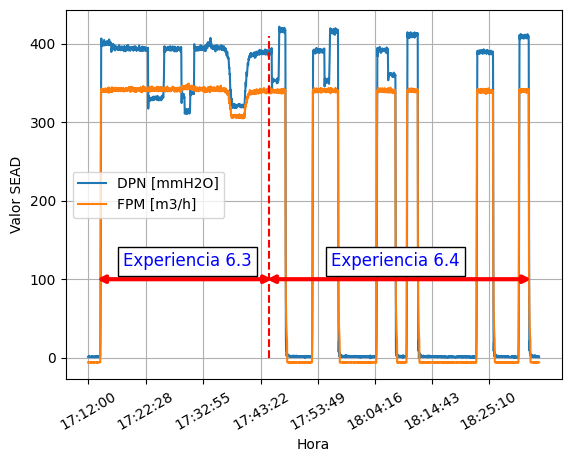

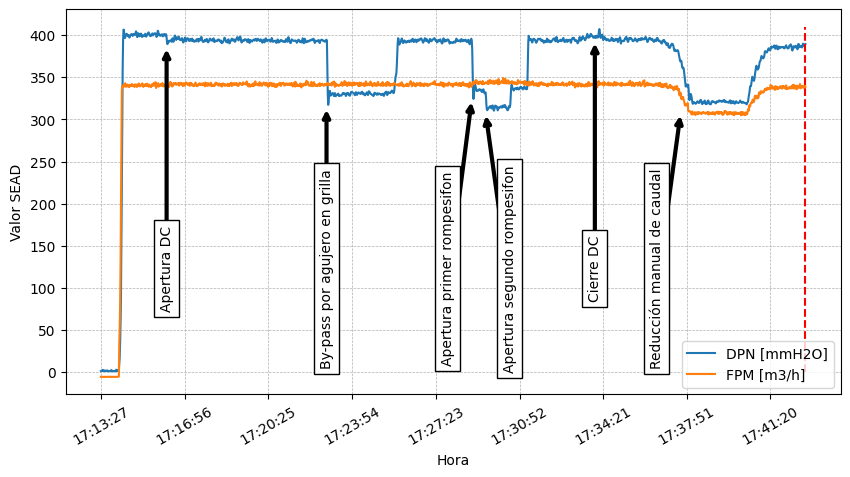

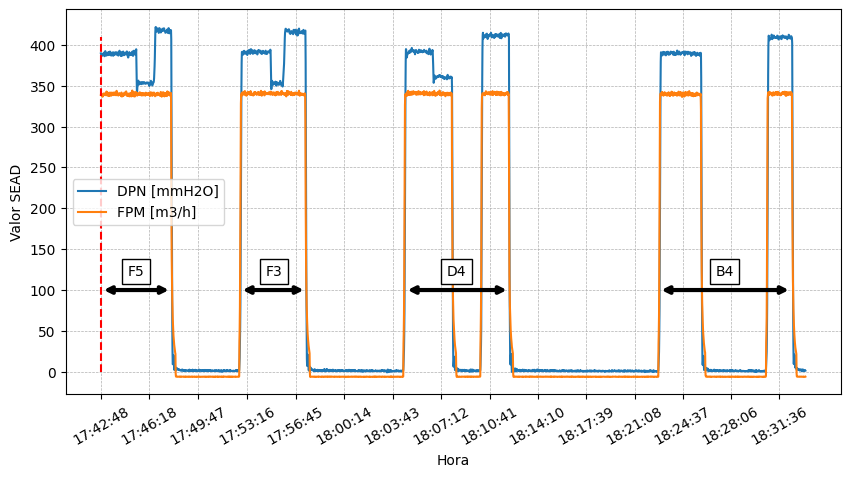

In [2]:
# Mediciones dummy
agujero_grilla = convertir_descarga_dataframe("1a_agujero_grilla.txt")
agujero_grilla2 = convertir_descarga_dataframe("1a_agujero_grilla2.txt")
caudal_bajo = convertir_descarga_dataframe("1a_caudal_bajo.txt")
condicion_nominal = convertir_descarga_dataframe("1a_condicion_nominal.txt")
DC = convertir_descarga_dataframe("1a_DC.txt")
encendido_bomba = convertir_descarga_dataframe("1a_encendido_bomba.txt")
reduccion_caudal = convertir_descarga_dataframe("1a_reduccion_caudal.txt")
rompesifon = convertir_descarga_dataframe("1a_rompesifon.txt")
rompesifon2 = convertir_descarga_dataframe("1a_rompesifon2.txt")
B4_colocacion_dummy = convertir_descarga_dataframe("b_B4_colocacion_dummy.txt")
D4_colocacion_dummy = convertir_descarga_dataframe("b_D4_colocacion_dummy.txt")
F3_colocacion_dummy = convertir_descarga_dataframe("b_F3_colocacion_dummy.txt")
F5_retiro_dummy = convertir_descarga_dataframe("b_F5_retiro_dummy.txt")


# Mediciones SEAD
# %matplotlib widget

# Hay un desfase de 10 minutos. Si se registro como 17:14:00, en realidad fue a las 17:04:00.

df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:12:00").idxmax()
df_aux = df.iloc[pos_1 : ]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN [mmH2O]")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM [m3/h]")
plt.xlabel("Hora")
plt.ylabel("Valor SEAD")
# plt.hlines(100, xmin="17:14:06", xmax="17:44:58", colors='r', linestyles='dashed', linewidth=1)
plt.annotate('', xy=("17:13:06", 100), xytext=("17:45:58", 100),
             arrowprops=dict(arrowstyle='<->', color='r', linewidth=3))
# plt.hlines(100, xmin="17:44:58", xmax="18:32:31", colors='r', linestyles='dashed', linewidth=1)
plt.annotate('', xy=("17:43:58", 100), xytext=("18:33:31", 100),
             arrowprops=dict(arrowstyle='<->', color='r', linewidth=3))
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::600]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.vlines("17:44:48", ymin=0, ymax=410, colors='red', linestyles='dashed', linewidth=1.5)

# Add floating text at a specific position
plt.text("17:30:00", 123, "Experiencia 6.3", fontsize=12, color='blue', ha='center', va='center', bbox=dict(facecolor='white', alpha=1))
plt.text("18:08:00", 123, "Experiencia 6.4", fontsize=12, color='blue', ha='center', va='center', bbox=dict(facecolor='white', alpha=1))
plt.show()


pos_1 = df["Hora"].ge("17:13:27").idxmax()
pos_2 = df["Hora"].ge("17:42:48").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure(figsize=(10, 5))
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN [mmH2O]")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM [m3/h]")
plt.xlabel("Hora")
plt.ylabel("Valor SEAD")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::200]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.yticks(np.arange(0, 450, 50))  # Adjust the step as needed
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.vlines("17:42:48", ymin=0, ymax=410, colors='red', linestyles='dashed', linewidth=1.5)
plt.annotate('', xy=("17:16:11", 100), xytext=("17:16:11", 387), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("17:16:11", 123, "Apertura DC", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1), rotation=90)

plt.annotate('', xy=("17:22:51", 100), xytext=("17:22:51", 315), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("17:22:51", 123, "By-pass por agujero en grilla", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1), rotation=90)

plt.annotate('', xy=("17:27:53", 100), xytext=("17:28:53", 324), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("17:27:53", 123, "Apertura primer rompesifon", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1), rotation=90)

plt.annotate('', xy=("17:30:28", 100), xytext=("17:29:28", 308), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("17:30:28", 123, "Apertura segundo rompesifon", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1), rotation=90)

plt.annotate('', xy=("17:34:01", 100), xytext=("17:34:01", 394), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("17:34:01", 123, "Cierre DC", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1), rotation=90)

plt.annotate('', xy=("17:36:36", 100), xytext=("17:37:36", 308), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("17:36:36", 123, "Reducción manual de caudal", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1), rotation=90)

plt.show()

pos_1 = df["Hora"].ge("17:42:48").idxmax()
pos_2 = df["Hora"].ge("18:33:30").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure(figsize=(10, 5))
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN [mmH2O]")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM [m3/h]")
plt.xlabel("Hora")
plt.ylabel("Valor SEAD")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::200]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.yticks(np.arange(0, 450, 50))  # Adjust the step as needed
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.vlines("17:42:48", ymin=0, ymax=410, colors='red', linestyles='dashed', linewidth=1.5)

plt.annotate('', xy=("17:42:48", 100), xytext=("17:47:54", 100), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("17:45:19", 123, "F5", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1))

plt.annotate('', xy=("17:52:44", 100), xytext=("17:57:32", 100), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("17:55:11", 123, "F3", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1))

plt.annotate('', xy=("18:04:34", 100), xytext=("18:12:09", 100), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("18:08:19", 123, "D4", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1))

plt.annotate('', xy=("18:22:51", 100), xytext=("18:32:30", 100), arrowprops=dict(arrowstyle='<->', color='black', linewidth=3))
plt.text("18:27:39", 123, "B4", fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=1))

plt.show()




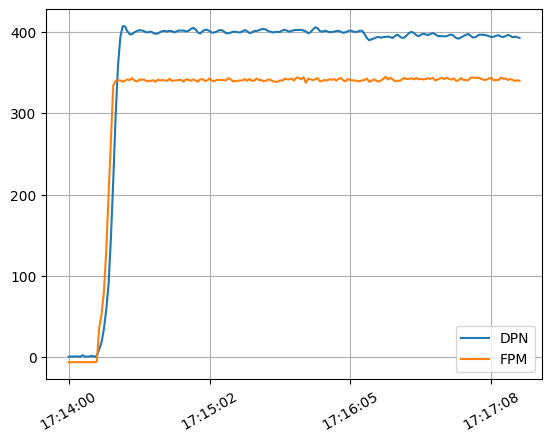

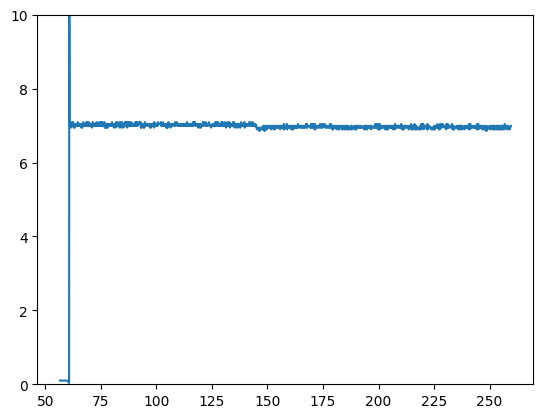

400.72031914893614 1.5201717792965006
340.9856015531257 0.8063739862243322
caudal: (340.6864893617022, 1.3047871820003278)
395.07810344827584 1.7568294884158295
338.48444263526676 0.8997806639093237
caudal: (341.85120689655173, 1.3136473016209063)
7.024010319715807 0.03807556472382372
12.082884772412076 0.07401371774669935
6.963117383216784 0.038301099318317496
11.979196280141538 0.0742760944543223


In [4]:
# 1a_encendido_bomba
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:14:00").idxmax()
pos_2 = df["Hora"].ge("17:17:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()


pos_1 = encendido_bomba["Tiempo"].ge(56).idxmax()
pos_2 = encendido_bomba["Tiempo"].ge(160).idxmax()
encendido_bomba_aux = encendido_bomba.iloc[pos_1:]
plt.figure()
plt.plot(encendido_bomba_aux["Tiempo"], encendido_bomba_aux["Frecuencia"])
plt.ylim(0, 10)
plt.show()

pos_1 = df["Hora"].ge("17:14:30").idxmax()
pos_2 = df["Hora"].ge("17:16:07").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

pos_1 = df["Hora"].ge("17:16:18").idxmax()
pos_2 = df["Hora"].ge("17:17:17").idxmax()
DPN_1, DPN_1_error = promedio(df.iloc[pos_1 : pos_2 + 1]["DPN"])
print(DPN_1, DPN_1_error)
caudal_1, caudal_1_error = caudal_por_deltap(DPN_1, DPN_1_error)
print(caudal_1, caudal_1_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

# -----------------
pos_1 = encendido_bomba["Tiempo"].ge(62.2).idxmax()
pos_2 = encendido_bomba["Tiempo"].ge(142.3).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    encendido_bomba["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)

pos_1 = encendido_bomba["Tiempo"].ge(147.3).idxmax()
pos_2 = encendido_bomba["Tiempo"].ge(250).idxmax()
frecuencia_1, frecuencia_1_error = promedio(
    encendido_bomba["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_1, frecuencia_1_error)
caudal_1, caudal_1_error = caudal_por_frecuencia(frecuencia_1, frecuencia_1_error)
print(caudal_1, caudal_1_error)


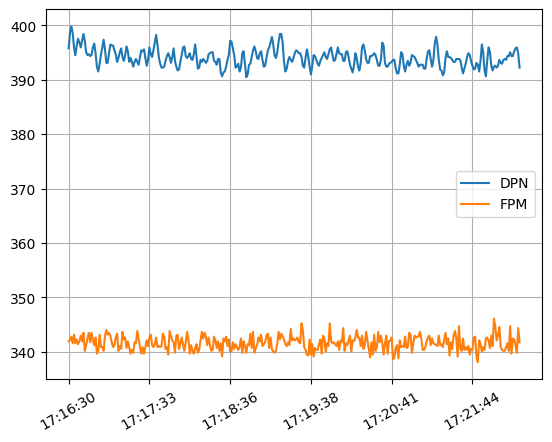

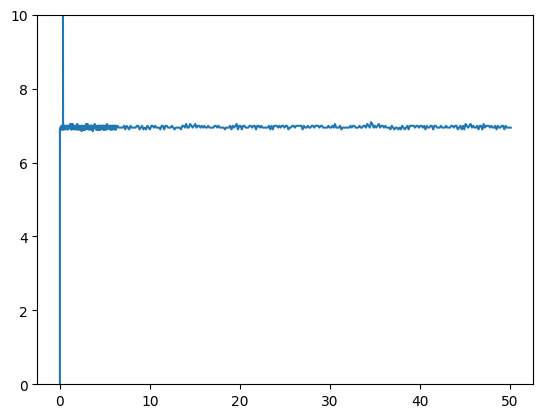

394.04259154929576 1.6121846046173514
338.0233967223505 0.8452145845498883
6.957760350328948 0.03765217884872749
11.970074324540132 0.0733011653734945


In [ ]:
# 1a_condicion_nominal
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:16:30").idxmax()
pos_2 = df["Hora"].ge("17:22:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = condicion_nominal["Tiempo"].ge(0).idxmax()
pos_2 = condicion_nominal["Tiempo"].ge(50).idxmax()
condicion_nominal_plot = condicion_nominal.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(condicion_nominal_plot["Tiempo"],condicion_nominal_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("17:16:30").idxmax()
pos_2 = df["Hora"].ge("17:22:40").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)

# -----------------
pos_1 = condicion_nominal["Tiempo"].ge(1.5).idxmax()
pos_2 = condicion_nominal["Tiempo"].ge(49).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    condicion_nominal["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)



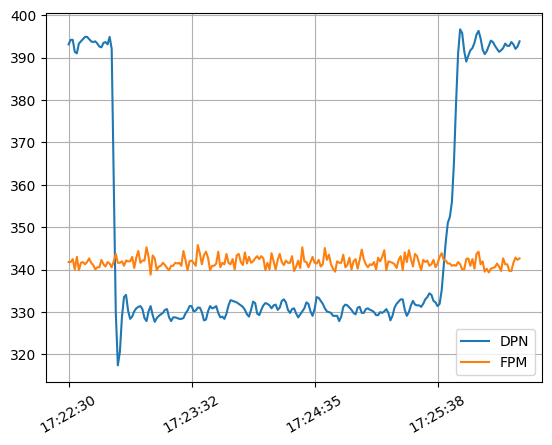

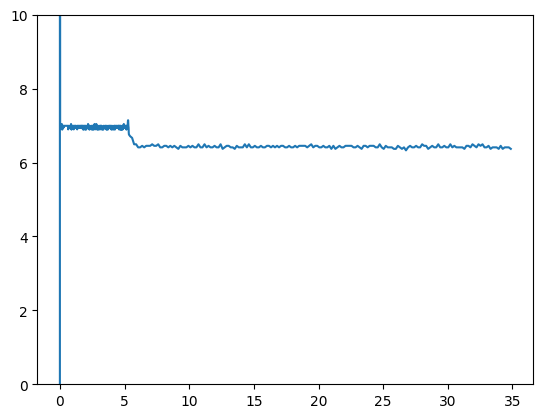

393.8370358306189 1.492622031748423
337.9318013425492 0.8005678190520956
330.4188732394366 1.3501539289351767
308.37646822748457 0.7914089694775318
caudal: (341.9217605633803, 1.3730819140423132)
6.955182851851852 0.03580042468267032
11.965685360133332 0.07055645566443955
6.428547228571429 0.03204540200321646
11.06893022081143 0.06440633143750246


In [5]:
# 1a_agujero_grilla
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:22:30").idxmax()
pos_2 = df["Hora"].ge("17:26:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = agujero_grilla["Tiempo"].ge(0).idxmax()
pos_2 = agujero_grilla["Tiempo"].ge(50).idxmax()
agujero_grilla_plot = agujero_grilla.iloc[pos_1 : ]
plt.figure()
plt.plot(agujero_grilla_plot["Tiempo"],agujero_grilla_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("17:17:20").idxmax()
pos_2 = df["Hora"].ge("17:22:40").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)

pos_1 = df["Hora"].ge("17:23:01").idxmax()
pos_2 = df["Hora"].ge("17:25:28").idxmax()
DPN_1, DPN_1_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_1, DPN_1_error)
caudal_1, caudal_1_error = caudal_por_deltap(DPN_1, DPN_1_error)
print(caudal_1, caudal_1_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

# -----------------
pos_1 = agujero_grilla["Tiempo"].ge(0.2).idxmax()
pos_2 = agujero_grilla["Tiempo"].ge(4.91).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    agujero_grilla["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)

pos_1 = agujero_grilla["Tiempo"].ge(6.38).idxmax()
pos_2 = agujero_grilla["Tiempo"].ge(33.6).idxmax()
frecuencia_1, frecuencia_1_error = promedio(
    agujero_grilla["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_1, frecuencia_1_error)
caudal_1, caudal_1_error = caudal_por_frecuencia(frecuencia_1, frecuencia_1_error)
print(caudal_1, caudal_1_error)

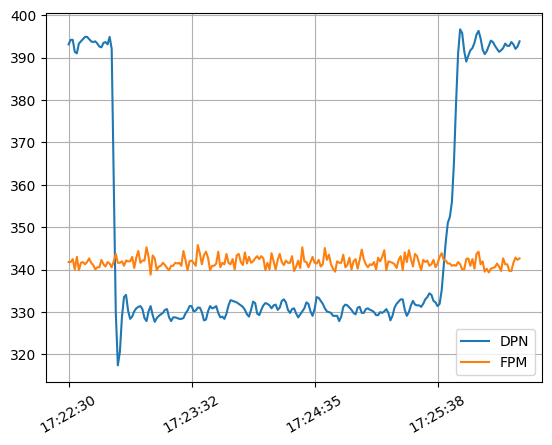

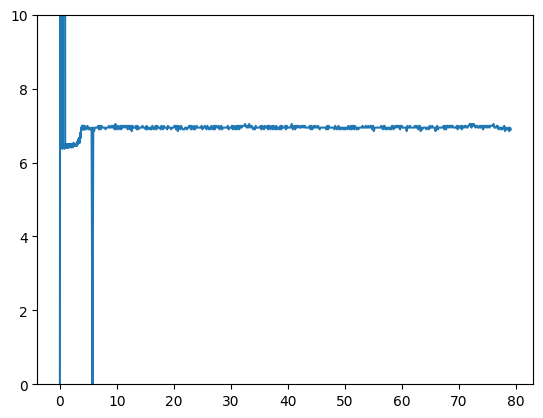

In [ ]:
# 1a_agujero_grilla_2
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:22:30").idxmax()
pos_2 = df["Hora"].ge("17:26:20").idxmax()
df = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df["Hora"], df["DPN"], label="DPN")
plt.plot(df["Hora"], df["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = agujero_grilla2["Tiempo"].ge(0).idxmax()
pos_2 = agujero_grilla2["Tiempo"].ge(50).idxmax()
agujero_grilla2_plot = agujero_grilla2.iloc[pos_1 : ]
plt.figure()
plt.plot(agujero_grilla2_plot["Tiempo"],agujero_grilla2_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

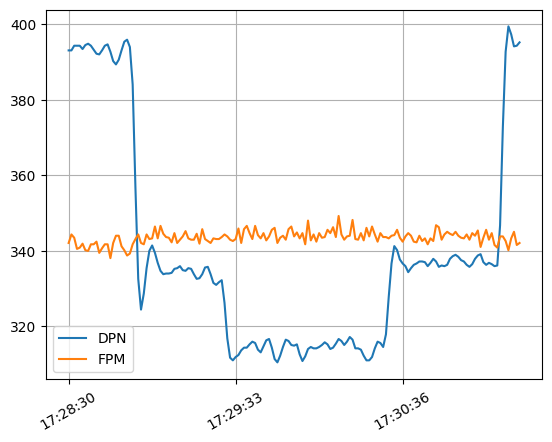

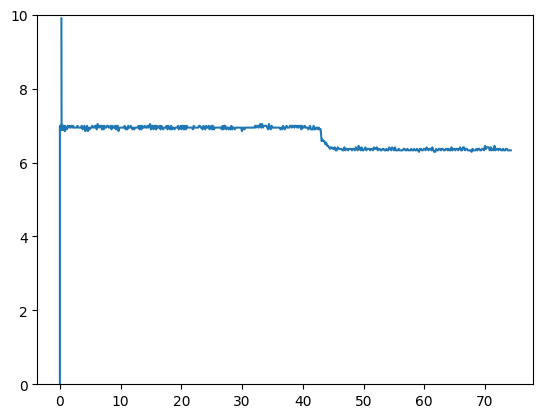

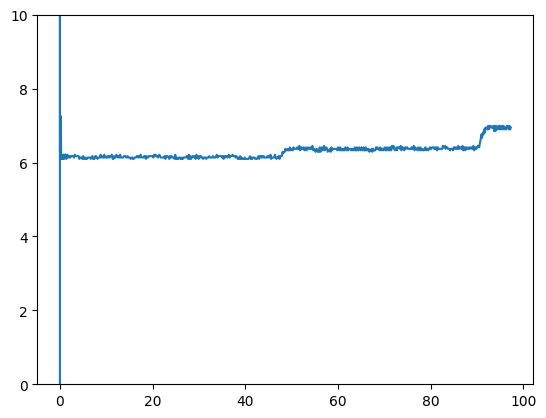

393.7088372093023 1.4935056454644116
337.87466361959565 0.800976907621158
334.50999999999993 0.9386285364358774
310.3680287223735 0.6318727921954915
caudal: (343.78941176470585, 1.270574073995149)
314.3566666666666 1.6780312538474678
300.4297457451809 0.9478182560233773
caudal: (344.49333333333334, 1.6413248375084732)
336.98733333333337 1.1175327984249777
311.5678064113298 0.6955534204330479
caudal: (343.8033333333333, 1.2509285440112967)
6.950460918439716 0.03702322798002274
11.957644851919149 0.07235718709806366
6.355623827586206 0.03152165301062127
10.944756253613791 0.06355752407513933
6.145252572438161 0.03125744871799084
10.5865360803477 0.06290773634149002
6.371106072289157 0.03680822579963448
10.971119419893975 0.07134081209901759


In [7]:
# 1a_rompesifon y 1a_rompesifon2
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:28:30").idxmax()
pos_2 = df["Hora"].ge("17:31:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = rompesifon["Tiempo"].ge(0).idxmax()
pos_2 = rompesifon["Tiempo"].ge(50).idxmax()
rompesifon_plot = rompesifon.iloc[pos_1 : ]
plt.figure()
plt.plot(rompesifon_plot["Tiempo"],rompesifon_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

pos_1 = rompesifon2["Tiempo"].ge(0).idxmax()
pos_2 = rompesifon2["Tiempo"].ge(50).idxmax()
rompesifon2_plot = rompesifon2.iloc[pos_1 : ]
plt.figure()
plt.plot(rompesifon2_plot["Tiempo"],rompesifon2_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("17:26:29").idxmax()
pos_2 = df["Hora"].ge("17:28:43").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)

pos_1 = df["Hora"].ge("17:29:05").idxmax()
pos_2 = df["Hora"].ge("17:29:21").idxmax()
DPN_1, DPN_1_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_1, DPN_1_error)
caudal_1, caudal_1_error = caudal_por_deltap(DPN_1, DPN_1_error)
print(caudal_1, caudal_1_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

pos_1 = df["Hora"].ge("17:29:34").idxmax()
pos_2 = df["Hora"].ge("17:30:23").idxmax()
DPN_2, DPN_2_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_2, DPN_2_error)
caudal_2, caudal_2_error = caudal_por_deltap(DPN_2, DPN_2_error)
print(caudal_2, caudal_2_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

pos_1 = df["Hora"].ge("17:30:36").idxmax()
pos_2 = df["Hora"].ge("17:31:06").idxmax()
DPN_3, DPN_3_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_3, DPN_3_error)
caudal_3, caudal_3_error = caudal_por_deltap(DPN_3, DPN_3_error)
print(caudal_3, caudal_3_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

# -----------------
pos_1 = rompesifon["Tiempo"].ge(1.1).idxmax()
pos_2 = rompesifon["Tiempo"].ge(41.4).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    rompesifon["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)

pos_1 = rompesifon["Tiempo"].ge(45.5).idxmax()
pos_2 = rompesifon["Tiempo"].ge(72.7).idxmax()
frecuencia_1, frecuencia_1_error = promedio(
    rompesifon["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_1, frecuencia_1_error)
caudal_1, caudal_1_error = caudal_por_frecuencia(frecuencia_1, frecuencia_1_error)
print(caudal_1, caudal_1_error)

pos_1 = rompesifon2["Tiempo"].ge(1.4).idxmax()
pos_2 = rompesifon2["Tiempo"].ge(45.8).idxmax()
frecuencia_2, frecuencia_2_error = promedio(
    rompesifon2["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_2, frecuencia_2_error)
caudal_2, caudal_2_error = caudal_por_frecuencia(frecuencia_2, frecuencia_2_error)
print(caudal_2, caudal_2_error)

pos_1 = rompesifon2["Tiempo"].ge(49.9).idxmax()
pos_2 = rompesifon2["Tiempo"].ge(88.8).idxmax()
frecuencia_3, frecuencia_3_error = promedio(
    rompesifon2["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_3, frecuencia_3_error)
caudal_3, caudal_3_error = caudal_por_frecuencia(frecuencia_3, frecuencia_3_error)
print(caudal_3, caudal_3_error)

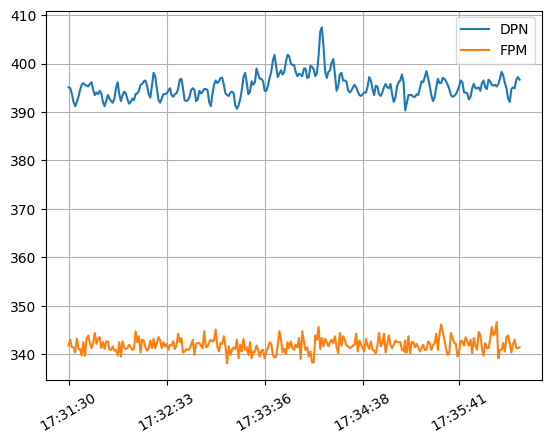

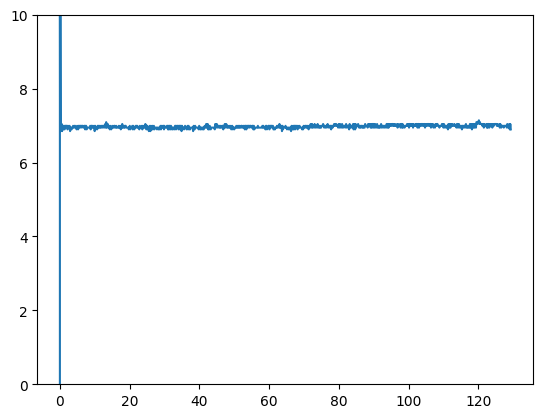

394.11657657657645 1.52982981771276
338.056358287323 0.8142130736309914
caudal: (341.9051351351351, 1.2576181296867792)
394.86672727272725 1.57666743428889
338.3903816353999 0.8312379358301455
caudal: (341.97318181818173, 1.4295936687923743)
6.953903531182797 0.03880674345200996
11.963506932898065 0.07502217284154128
6.996861786301369 0.040580856058718626
12.036656249713971 0.07774619104372571


In [9]:
# 1a_DC
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:31:30").idxmax()
pos_2 = df["Hora"].ge("17:36:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = DC["Tiempo"].ge(0).idxmax()
pos_2 = DC["Tiempo"].ge(50).idxmax()
DC_plot = DC.iloc[pos_1 : ]
plt.figure()
plt.plot(DC_plot["Tiempo"],DC_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("17:31:21").idxmax()
pos_2 = df["Hora"].ge("17:33:16").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

pos_1 = df["Hora"].ge("17:34:38").idxmax()
pos_2 = df["Hora"].ge("17:36:32").idxmax()
DPN_1, DPN_1_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_1, DPN_1_error)
caudal_1, caudal_1_error = caudal_por_deltap(DPN_1, DPN_1_error)
print(caudal_1, caudal_1_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

# -----------------
pos_1 = DC["Tiempo"].ge(2.2).idxmax()
pos_2 = DC["Tiempo"].ge(68.9).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    DC["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)

pos_1 = DC["Tiempo"].ge(74).idxmax()
pos_2 = DC["Tiempo"].ge(126).idxmax()
frecuencia_1, frecuencia_1_error = promedio(
    DC["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_1, frecuencia_1_error)
caudal_1, caudal_1_error = caudal_por_frecuencia(frecuencia_1, frecuencia_1_error)
print(caudal_1, caudal_1_error)

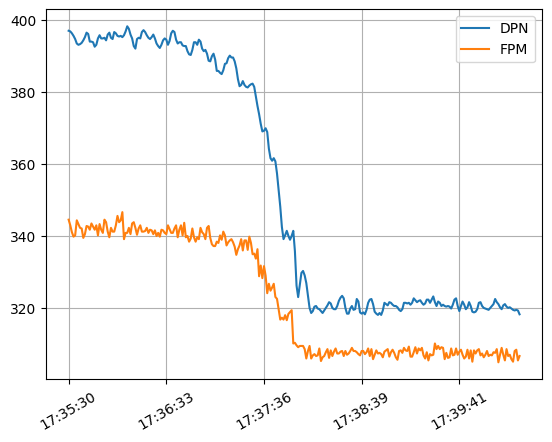

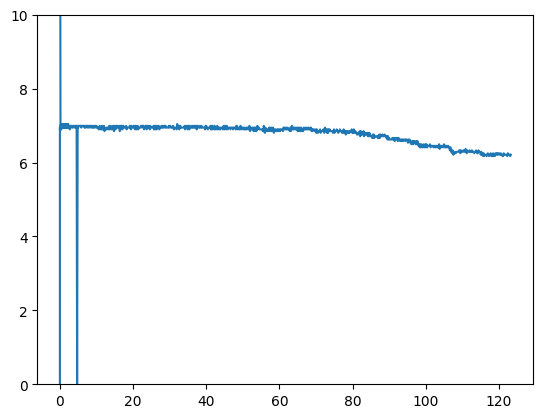

394.83818965517236 1.5521812233878542
338.3776805810533 0.8220784314041155
caudal: (341.9866379310344, 1.4144762305663174)
6.9395119097744375 0.04249653522762507
11.93900087996391 0.08059510362017074


In [10]:
# 1a_reduccion_caudal
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:35:30").idxmax()
pos_2 = df["Hora"].ge("17:40:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = reduccion_caudal["Tiempo"].ge(0).idxmax()
pos_2 = reduccion_caudal["Tiempo"].ge(50).idxmax()
reduccion_caudal_plot = reduccion_caudal.iloc[pos_1 : ]
plt.figure()
plt.plot(reduccion_caudal_plot["Tiempo"],reduccion_caudal_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("17:34:30").idxmax()
pos_2 = df["Hora"].ge("17:36:30").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

# -----------------
pos_1 = reduccion_caudal["Tiempo"].ge(6.1).idxmax()
pos_2 = reduccion_caudal["Tiempo"].ge(63.5).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    reduccion_caudal["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)

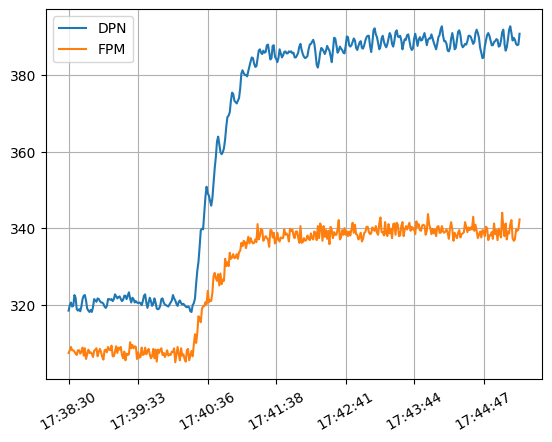

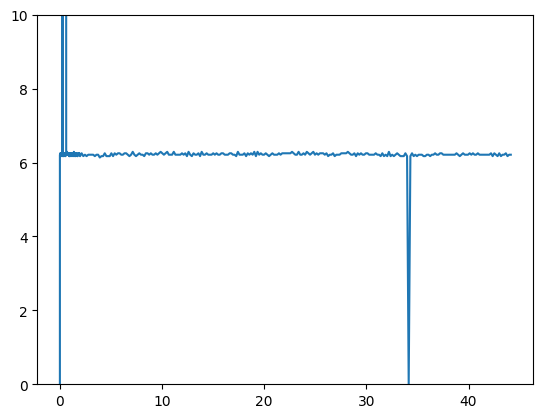

320.6424786324787 1.2365722584621317
303.564406651515 0.753245538020098
caudal: (307.538547008547, 1.0198108295816812)
6.224030880208333 0.032176462414337616
10.720679782818747 0.06433540728854419


In [11]:
# 1a_caudal_bajo
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:38:30").idxmax()
pos_2 = df["Hora"].ge("17:45:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = caudal_bajo["Tiempo"].ge(0).idxmax()
pos_2 = caudal_bajo["Tiempo"].ge(50).idxmax()
caudal_bajo_plot = caudal_bajo.iloc[pos_1 : ]
plt.figure()
plt.plot(caudal_bajo_plot["Tiempo"],caudal_bajo_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("17:38:08").idxmax()
pos_2 = df["Hora"].ge("17:40:10").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)
print("caudal:", promedio(df["FPM"].iloc[pos_1 : pos_2 + 1]))

# -----------------
pos_1 = caudal_bajo["Tiempo"].ge(2.2).idxmax()
pos_2 = caudal_bajo["Tiempo"].ge(32.94).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    caudal_bajo["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)

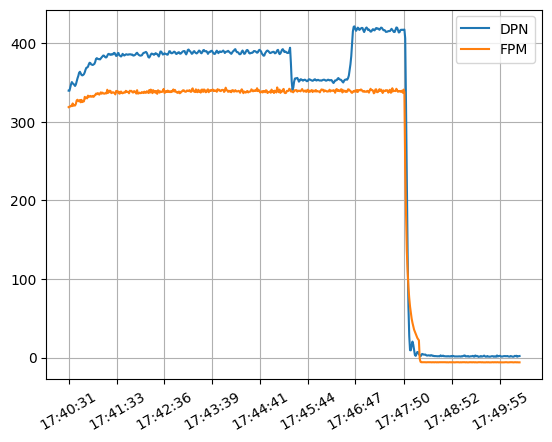

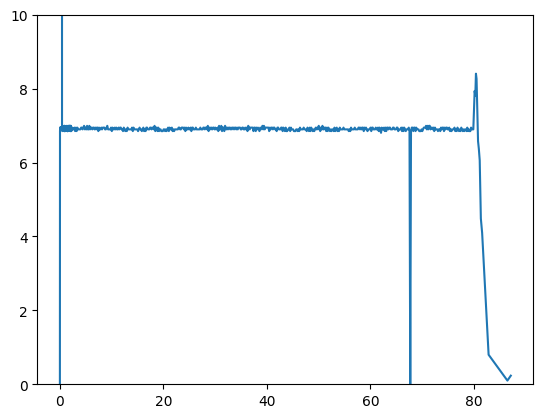

388.77111801242233 1.7407169914888994
335.6665361600968 0.8986952559154886
417.3867307692307 1.8028020083639105
348.2688386385376 0.8999314806485635
(64.7414058045135, 5.994710592961779)
6.909771488317757 0.03654561930742112
11.888358890307474 0.07159869050958553


In [ ]:
# b_F5_retiro_dummy
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:40:30").idxmax()
pos_2 = df["Hora"].ge("17:50:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = F5_retiro_dummy["Tiempo"].ge(0).idxmax()
pos_2 = F5_retiro_dummy["Tiempo"].ge(50).idxmax()
F5_retiro_dummy_plot = F5_retiro_dummy.iloc[pos_1 : ]
plt.figure()
plt.plot(F5_retiro_dummy_plot["Tiempo"],F5_retiro_dummy_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("17:42:24").idxmax()
pos_2 = df["Hora"].ge("17:45:12").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)

pos_1 = df["Hora"].ge("17:46:51").idxmax()
pos_2 = df["Hora"].ge("17:47:44").idxmax()
DPN_1, DPN_1_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_1, DPN_1_error)
caudal_1, caudal_1_error = caudal_por_deltap(DPN_1, DPN_1_error)
print(caudal_1, caudal_1_error)

print(caudal_por_deltap(DPN_1 - DPN_0, np.sqrt(DPN_0_error**2 + DPN_1_error**2)))

# -----------------
pos_1 = F5_retiro_dummy["Tiempo"].ge(3.8).idxmax()
pos_2 = F5_retiro_dummy["Tiempo"].ge(65.6).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    F5_retiro_dummy["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)


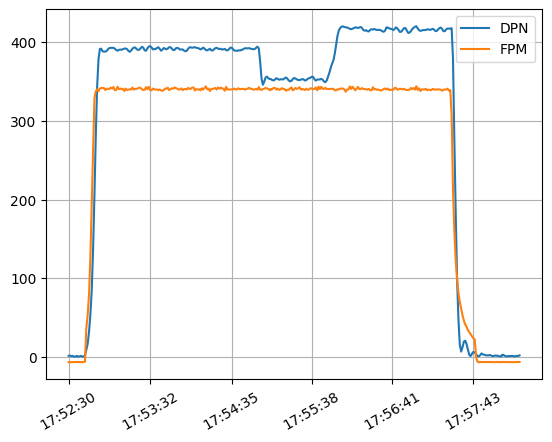

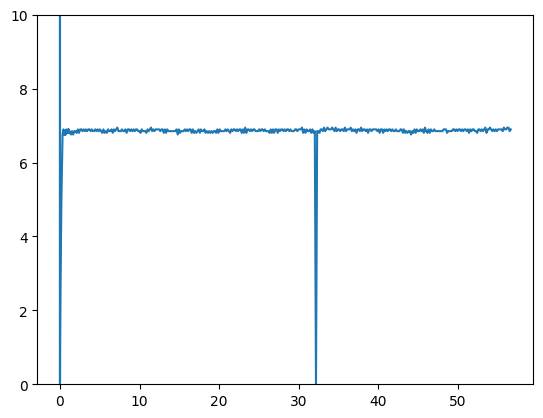

391.0451401869159 1.5142021522629412
336.685268367682 0.8104136847233508
415.89222222222224 1.8202702960322372
347.62196534428887 0.9076178002027011
(55.284265488784825, 6.65419696913578)
6.8631392899999994 0.036293731419845696
11.808953583011998 0.07116776044028174


In [ ]:
# b_F3_colocacion_dummy
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("17:52:30").idxmax()
pos_2 = df["Hora"].ge("17:58:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = F3_colocacion_dummy["Tiempo"].ge(0).idxmax()
pos_2 = F3_colocacion_dummy["Tiempo"].ge(50).idxmax()
F3_colocacion_dummy_plot = F3_colocacion_dummy.iloc[pos_1 : ]
plt.figure()
plt.plot(F3_colocacion_dummy_plot["Tiempo"],F3_colocacion_dummy_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("17:52:58").idxmax()
pos_2 = df["Hora"].ge("17:54:49").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)

pos_1 = df["Hora"].ge("17:56:06").idxmax()
pos_2 = df["Hora"].ge("17:57:20").idxmax()
DPN_1, DPN_1_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_1, DPN_1_error)
caudal_1, caudal_1_error = caudal_por_deltap(DPN_1, DPN_1_error)
print(caudal_1, caudal_1_error)

print(caudal_por_deltap(DPN_1 - DPN_0, np.sqrt(DPN_0_error**2 + DPN_1_error**2)))

# -----------------
pos_1 = F3_colocacion_dummy["Tiempo"].ge(2.1).idxmax()
pos_2 = F3_colocacion_dummy["Tiempo"].ge(31.1).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    F3_colocacion_dummy["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)

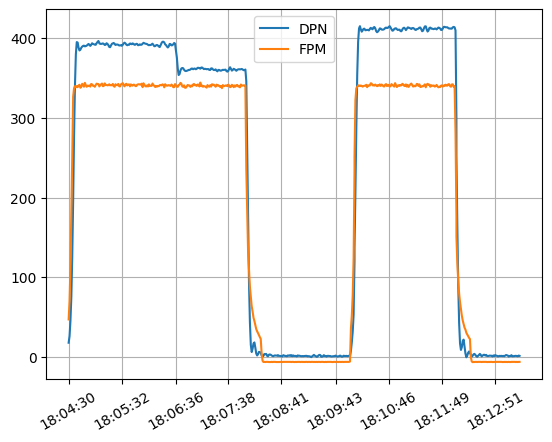

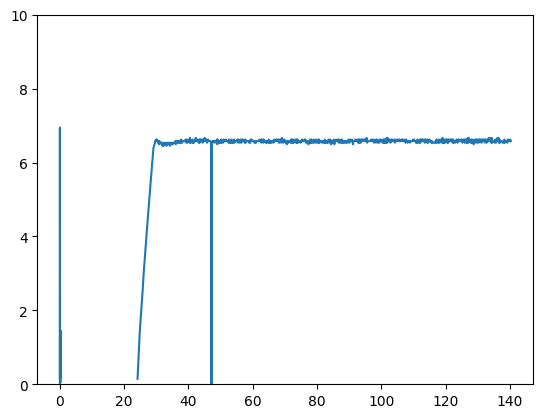

391.74886597938143 1.5225635438053364
336.9999043560076 0.813072108299589
411.3782474226804 1.5625013057705235
345.6608161566893 0.8152168710340526
(38.53249857946911, 8.84357317557839)
6.579511520282188 0.03465656742110517
11.325992216736509 0.0684005567520249


In [ ]:
# b_D4_colocacion_dummy
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("18:04:30").idxmax()
pos_2 = df["Hora"].ge("18:13:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = D4_colocacion_dummy["Tiempo"].ge(0).idxmax()
pos_2 = D4_colocacion_dummy["Tiempo"].ge(50).idxmax()
D4_colocacion_dummy_plot = D4_colocacion_dummy.iloc[pos_1 : ]
plt.figure()
plt.plot(D4_colocacion_dummy_plot["Tiempo"],D4_colocacion_dummy_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("18:04:46").idxmax()
pos_2 = df["Hora"].ge("18:06:27").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)

pos_1 = df["Hora"].ge("18:10:17").idxmax()
pos_2 = df["Hora"].ge("18:11:57").idxmax()
DPN_1, DPN_1_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_1, DPN_1_error)
caudal_1, caudal_1_error = caudal_por_deltap(DPN_1, DPN_1_error)
print(caudal_1, caudal_1_error)

print(caudal_por_deltap(DPN_1 - DPN_0, np.sqrt(DPN_0_error**2 + DPN_1_error**2)))

# -----------------
pos_1 = D4_colocacion_dummy["Tiempo"].ge(51.5).idxmax()
pos_2 = D4_colocacion_dummy["Tiempo"].ge(137.7).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    D4_colocacion_dummy["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)

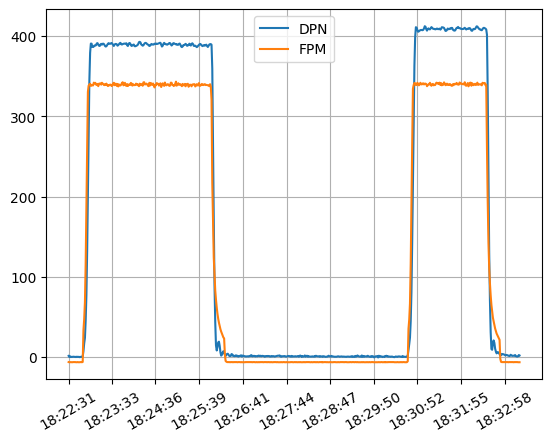

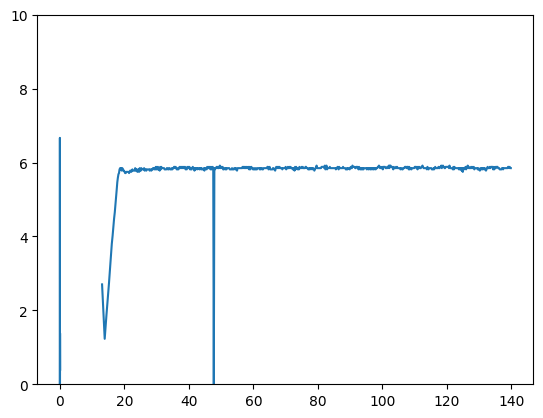

389.5604487179487 1.3773913205528283
336.0204959674715 0.7608600527547437
409.13551724137926 1.3329189804048207
344.68228658746364 0.7348110743968497
(38.319631177288514, 7.893648203258182)
6.57920634676007 0.03472556858291742
11.325472567263045 0.06850157267796238


In [ ]:
# b_B4_colocacion_dummy
df = pd.read_csv("25_02_25-14_49.TXT", delimiter=",")
pos_1 = df["Hora"].ge("18:22:30").idxmax()
pos_2 = df["Hora"].ge("18:33:20").idxmax()
df_aux = df.iloc[pos_1 : pos_2 + 1]
plt.figure()
plt.plot(df_aux["Hora"], df_aux["DPN"], label="DPN")
plt.plot(df_aux["Hora"], df_aux["FPM"], label="FPM")
plt.legend()
# Set fewer xticks
xticks = df_aux["Hora"][::60]  # Adjust the step as needed
plt.gca().set_xticks(xticks)
plt.xticks(rotation=30)
plt.grid()
plt.show()

pos_1 = B4_colocacion_dummy["Tiempo"].ge(0).idxmax()
pos_2 = B4_colocacion_dummy["Tiempo"].ge(50).idxmax()
B4_colocacion_dummy_plot = B4_colocacion_dummy.iloc[pos_1 : ]
plt.figure()
plt.plot(B4_colocacion_dummy_plot["Tiempo"],B4_colocacion_dummy_plot["Frecuencia"])
plt.ylim(0, 10)
plt.show()

#-----------------
pos_1 = df["Hora"].ge("18:23:06").idxmax()
pos_2 = df["Hora"].ge("18:25:47").idxmax()
DPN_0, DPN_0_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_0, DPN_0_error)
caudal_0, caudal_0_error = caudal_por_deltap(DPN_0, DPN_0_error)
print(caudal_0, caudal_0_error)

pos_1 = df["Hora"].ge("18:30:54").idxmax()
pos_2 = df["Hora"].ge("18:32:24").idxmax()
DPN_1, DPN_1_error = promedio(df["DPN"].iloc[pos_1 : pos_2 + 1])
print(DPN_1, DPN_1_error)
caudal_1, caudal_1_error = caudal_por_deltap(DPN_1, DPN_1_error)
print(caudal_1, caudal_1_error)

print(caudal_por_deltap(DPN_1 - DPN_0, np.sqrt(DPN_0_error**2 + DPN_1_error**2)))

# -----------------
pos_1 = D4_colocacion_dummy["Tiempo"].ge(51.9).idxmax()
pos_2 = D4_colocacion_dummy["Tiempo"].ge(138.7).idxmax()
frecuencia_0, frecuencia_0_error = promedio(
    D4_colocacion_dummy["Frecuencia"].iloc[pos_1 : pos_2 + 1]
)
print(frecuencia_0, frecuencia_0_error)
caudal_0, caudal_0_error = caudal_por_frecuencia(frecuencia_0, frecuencia_0_error)
print(caudal_0, caudal_0_error)